# **1. Business Problem.**

## **1.1. Description.**

The "Document Visual Question Answering" System (or DocVQA),
focuses on a specific type of Visual Question Answering task, where
visually understanding the information on a document image is
necessary in order to provide an answer. This goes over and above
passing a document image through OCR, and involves understanding
all types of information conveyed by a document. Textual content
(handwritten or typewritten), non-textual elements (marks, tick boxes,
separators, diagrams), layout (page structure, forms, tables), and style
(font, colours, highlighting), to mention just a few, are pieces of
information that can be potentially necessary for responding to the
question at hand.

## **1.2. Problem Statement.**

1.   There has been a lot of research based on the useful
information extraction from the document images till date.
These reading systems did not only extract and interpret the
textual (handwritten, typewritten or printed) content of the
document images, but also exploited numerous other visual
cues including layout (page structure, forms, tables),non-textual
elements (marks, tick boxes, separators, diagrams) and style
(font, colours, highlighting), to mention just a few.
2.   Also, there are many models based on Question Answering
systems based on just texts using NLP tasks or even Scene
Text Question Answering systems. These approaches have
either focused on specific document elements or on specific
collections such as book covers or number plates.
3.   However, there hasn’t been much innovation with respect to
"Document Visual Question Answering" which focuses on a
specific type of Visual Question Answering task, where visually
understanding the information on a document image is
necessary in order to provide an answer. For example,

<img src="https://rrc.cvc.uab.es/files/DocVQA_ex3.2_qjvj0224_2.png" width="400" height="500"></img>

**What is the issue at the top of the pyramid?** Retailer calls/ other issues

**Which is the least critical issue for live rep support?** Retailer calls/other
issues

**Which is the most critical issue for live rep support?** Product
quality/liability issues

4.   Thus we, the participants, are asked to create a robust model
which will return answers based on the right questions asked
on the right document. The model should be able to detect the
layout of the document in order to get the right answers from
the requested document

## **1.3. Applications.**

1.   Document Visual Question Answering can have many
applications in the Financial domain. Questions can be asked
on various types of documents to retrieve the answers
accordingly.
2.   It can also be provided as a cloud based service on various
cloud platforms.

## **1.4. Real-world/Business objectives and constraints.**

1.   Predict the answers of the questions based on the document
images and/or the OCR outputs of that image.
2.   The answers should be obtained in a relatively less time
possible.
3.   Interpretability is important since the question asked on the
specific document should return the right answer and not an
answer present in another document.
4.   We have to try our best in obtaining the best possible ANLS
score.

# **2. Machine Learning Problem.**

## **2.1. Data Collection.**

The dataset is publicly available on the RRC website
(https://rrc.c0vc.uab.es/?ch=17&com=introduction).

In [ ]:
!wget http://datasets.cvc.uab.es/rrc/DocVQA/test.tar.gz
!wget http://datasets.cvc.uab.es/rrc/DocVQA/train.tar.gz
!wget http://datasets.cvc.uab.es/rrc/DocVQA/val.tar.gz
!mkdir /content/Data
!tar -xf train.tar.gz -C /content/Data
!tar -xf test.tar.gz -C /content/Data
!tar -xf val.tar.gz -C /content/Data
!rm test.tar.gz
!rm train.tar.gz
!rm val.tar.gz

--2021-01-05 19:34:37--  http://datasets.cvc.uab.es/rrc/DocVQA/test.tar.gz
Resolving datasets.cvc.uab.es (datasets.cvc.uab.es)... 158.109.8.18
Connecting to datasets.cvc.uab.es (datasets.cvc.uab.es)|158.109.8.18|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 921292800 (879M) [application/x-gzip]
Saving to: ‘test.tar.gz’

test.tar.gz         100%[===================>] 878.61M  4.37MB/s    in 4m 46s  

2021-01-05 19:39:23 (3.07 MB/s) - ‘test.tar.gz’ saved [921292800/921292800]

--2021-01-05 19:39:23--  http://datasets.cvc.uab.es/rrc/DocVQA/train.tar.gz
Resolving datasets.cvc.uab.es (datasets.cvc.uab.es)... 158.109.8.18
Connecting to datasets.cvc.uab.es (datasets.cvc.uab.es)|158.109.8.18|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7122739200 (6.6G) [application/x-gzip]
Saving to: ‘train.tar.gz’

train.tar.gz        100%[===================>]   6.63G  4.11MB/s    in 26m 19s 

2021-01-05 20:05:43 (4.30 MB/s) - ‘train.tar.gz’ saved [7122

## **2.2. Introduction to Data.**

The dataset consists of 12,767 document images of varied
types and content, over which there are 50,000 questions and
answers which are defined. The questions defined are
categorised based on their reasoning requirements such as
‘What are’, ‘Who is’, etc..


The dataset has been split randomly by the organizers in an
80-10-10 ratio to train, validation and test splits. The train split
therefore has 39,463 questions and 10,194 images, the
validation split has 5,349 questions and 1,286 images and the
test split has 5,188 questions and 1,287 images.

In [ ]:
# Printing the folders present in the dataset
!ls /content/Data/

test  train  val


In [ ]:
import glob
print("Number of images in Train data : ",len(glob.glob("/content/Data/train/documents/*.png")))

Number of images in Train data :  10194


In [ ]:
print("Number of images in Validation data : ",len(glob.glob("/content/Data/val/documents/*.png")))

Number of images in Validation data :  1286


In [ ]:
print("Number of images in Test data : ",len(glob.glob("/content/Data/test/documents/*.png")))

Number of images in Test data :  1287


Each of the datasets have 2 folders (documents and ocr_results) and a json file (type_v1.0.json which have questions) present in
them.

In [ ]:
!ls /content/Data/train

documents  ocr_results	train_v1.0.json


In [ ]:
!ls /content/Data/val

documents  ocr_results	val_v1.0.json


In [ ]:
!ls /content/Data/test

documents  ocr_results	test_v1.0.json


In [ ]:
import json
with open('/content/Data/train/train_v1.0.json', 'r') as f:
    annotations = json.load(f)
print('Number of questions in Train data : ',len(annotations['data']))

Number of questions in Train data :  39463


In [ ]:
with open('/content/Data/val/val_v1.0.json', 'r') as f:
    annotations = json.load(f)
print('Number of questions in Validation data : ',len(annotations['data']))

Number of questions in Validation data :  5349


In [ ]:
with open('/content/Data/test/test_v1.0.json', 'r') as f:
    annotations = json.load(f)
print('Number of questions in Test data : ',len(annotations['data']))

Number of questions in Test data :  5188


The ‘documents’ folder has all the document images present in
them. The ‘ocr_results’ folder consists of the ground truth
annotations of those document images in a json format(OCR
results to be precise).

In [ ]:
with open('/content/Data/train/ocr_results/ffbf0023_4.json', 'r') as f:
    annotations = json.load(f)

In [ ]:
annotations

{'recognitionResults': [{'clockwiseOrientation': 359.96,
   'height': 2245,
   'lines': [{'boundingBox': [622, 138, 1137, 136, 1138, 167, 622, 168],
     'text': 'R. J. REYNOLDS TOBACCO COMPANY',
     'words': [{'boundingBox': [622, 138, 655, 139, 656, 168, 624, 167],
       'text': 'R.'},
      {'boundingBox': [661, 139, 685, 140, 687, 168, 662, 168], 'text': 'J.'},
      {'boundingBox': [691, 140, 847, 141, 849, 168, 692, 168],
       'text': 'REYNOLDS'},
      {'boundingBox': [855, 141, 988, 140, 991, 167, 857, 168],
       'text': 'TOBACCO'},
      {'boundingBox': [998, 140, 1135, 137, 1138, 165, 1000, 167],
       'text': 'COMPANY'}]},
    {'boundingBox': [534, 170, 1216, 168, 1217, 202, 535, 203],
     'text': 'RETAIL PARTNERS MARKETING PLAN CONTRACT',
     'words': [{'boundingBox': [539, 171, 643, 174, 645, 203, 541, 202],
       'text': 'RETAIL'},
      {'boundingBox': [649, 174, 801, 175, 803, 203, 651, 203],
       'text': 'PARTNERS'},
      {'boundingBox': [808, 175, 974, 17

The json file which comes with the dataset has the following
format(explanation in italics):

{

"dataset_name": "docvqa", The name of the dataset, should
be invariably "docvqa"

"dataset_split": "train", The subset (either "train" or "test")

"dataset_version": "0.1", The version of the dataset. A string
in the format of major.minor version

"data": [{...}]

}

In [ ]:
with open('/content/Data/train/train_v1.0.json', 'r') as f:
    annotations = json.load(f)

In [ ]:
annotations.keys()

dict_keys(['dataset_name', 'dataset_version', 'dataset_split', 'data'])

In [ ]:
print(list(annotations.keys())[0],'\t:',annotations[list(annotations.keys())[0]])
print(list(annotations.keys())[1],':',annotations[list(annotations.keys())[1]])
print(list(annotations.keys())[2],'\t:',annotations[list(annotations.keys())[2]])

dataset_name 	: docvqa
dataset_version : 1.0
dataset_split 	: train


The ‘data’ element is a list of document entries with the
following structure:

{

"questionId": 52212, A unique ID number for the question

"question": "Whose signature is given?", The question string - natural language asked question

"image": "documents/txpn0095_1.png", The image filename
corresponding to the document page which the question is
defined on. The images are provided in the /documents folder

"docId": 1968, A unique ID number for the document

"ucsf_document_id": "txpn0095", The UCSF document id
number

"ucsf_document_page_no": "1", The page number within the
UCSF document that is used here

"answers": ["Edward R. Shannon", "Edward Shannon"], A list
of correct answers provided by annotators

"data_split": "train" The dataset split this question pertains
to

}

In [ ]:
print(list(annotations.keys())[3],':')
annotations[list(annotations.keys())[3]][0]

data :


{'answers': ['1/8/93'],
 'data_split': 'train',
 'docId': 279,
 'image': 'documents/xnbl0037_1.png',
 'question': 'what is the date mentioned in this letter?',
 'questionId': 337,
 'ucsf_document_id': 'xnbl0037',
 'ucsf_document_page_no': '1'}

## **2.3. Mapping the real-world problem to an ML Problem.**

### **2.3.1. Performance Metric.**

The evaluation metric to be used for this case study is Average
Normalized Levenshtein Similarity (ANLS). The ANLS smoothly
captures the OCR mistakes applying a slight penalization in
case of correct intended responses, but badly recognized. It
also makes use of a threshold of value ‘τ’ that dictates whether
the output of the metric will be the ANLS if its value is equal or
bigger than ‘τ’ or 0 otherwise. The key point of this threshold is
to determine if the answer has been correctly selected but not
properly recognized, or on the contrary, the output is a wrong
text selected from the options and given as an answer. More
formally, the ANLS between the net output and the ground
truth answers is given by equation 1. Where N is the total
number of questions, M total number of Ground Truth answers
per question, aij
the ground truth answers where i = {0, ..., N},
and j = {0, ..., M}, and oqi be the network's answer for the i
th
question qi
. It is not case sensitive, but space sensitive.

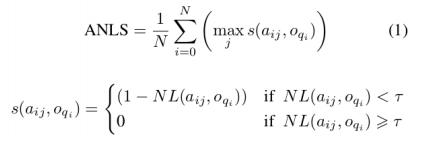

Over here NL(aij
, oqi
) represents the Normalized Levenshtein
distance between the strings aij and oqi
. The Normalized
Levenshtein distance is a value between 0 and 1. Since the
condition is 1 - NL(aij
, oqi
), that is why the ANLS metric has the
term Normalized Levenshtein “Similarity” rather than
Normalized Levenshtein “Distance” because NL(Similarity) = 1 -
NL(Distance). The Levenshtein distance between two strings a,
b (of length |a| and |b| respectively) is given by lev(a, b) where

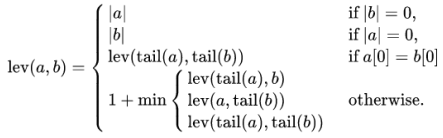

where the tail of some string x is a string of all but the first
character of x, and x[n] is the n
th character of the string x,
starting with character 0. Note that the first element in the
minimum corresponds to deletion (from a to b), the second to
insertion and the third to replacement.

We then define a threshold τ (usually 0.5) to filter NL values
larger than this value by returning a score of 0 if the NL is
larger than τ. The intuition behind the threshold is that if an
output has a normalized edit distance of more than τ to an
answer, I reason that this is due to returning the wrong
document image text instance, and not due to recognition
errors. Otherwise, the metric has a smooth response that can
gracefully capture errors both in providing good answers and in recognizing the right document text. All methods submitted
as part of the competition are evaluated automatically using
the above protocol at the RRC portal as well.

### **2.3.2. Machine Learning Objectives and Constraints.**

**Objective** : Predict the answers of the questions based on the
OCR outputs and the document images.

**Constraints** : Penalize the wrong answers
predicted with respect to the right document.

# **3. Importing Libraries**

In [ ]:
import glob
import PIL
import json
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as p9
from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS
warnings.filterwarnings('ignore')

# **4. Analysis**

## **4.1. Images**

In [ ]:
# Getting all the paths of the images
image_paths = glob.glob("/content/Data/train/documents/*.png")

In [ ]:
#Getting the heights and widths of the images
width = []
height = []
for i in tqdm(image_paths):
  w,h = PIL.Image.open(i).size
  width.append(w)
  height.append(h)

100%|██████████| 10194/10194 [00:00<00:00, 12191.66it/s]


In [ ]:
print('Maximum width\t: ',max(width))
print('Maximum height\t: ',max(height))

print('Minimum width\t: ',min(width))
print('Minimum height\t: ',min(height))

print('Mean width\t: ',sum(width)/len(width))
print('Mean height\t: ',sum(height)/len(height))

Maximum width	:  7219
Maximum height	:  9723
Minimum width	:  200
Minimum height	:  206
Mean width	:  1739.3593290170688
Mean height	:  2088.8377476947226


In [ ]:
# Creating a Dataframe to store all the important details
df = pd.DataFrame(list(zip(image_paths, width, height)), columns =['Image', 'Image_width', 'Image_height']) 
df.head()

,Image,Image_width,Image_height
0,/content/Data/train/documents/lzfl0226_26.png,796,1046
1,/content/Data/train/documents/nljw0023_1.png,1692,2245
2,/content/Data/train/documents/skvj0223_9.png,1467,1986
3,/content/Data/train/documents/rjwm0227_2.png,2256,1755
4,/content/Data/train/documents/xrcy0227_30.png,1776,751


			Image Width vs Image Height


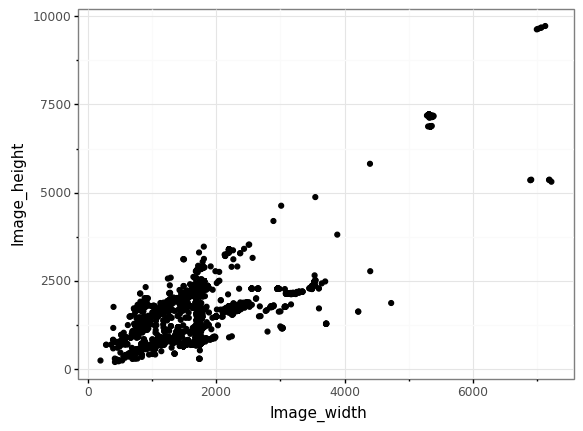

<ggplot: (-9223363257730059362)>


In [ ]:
warnings.filterwarnings('ignore')
print("\t\t\tImage Width vs Image Height")
print(
    p9.ggplot(df, p9.aes(x='Image_width', y='Image_height')) + 
    p9.geom_point() +
    p9.theme_bw())

*Thus, with this plot we can notice that there are many images with image widths less than 2000 and image heights less than 2500.*

## **4.2. OCR Text**

In [ ]:
# Getting all the paths of the ocr text data

ocr_paths = glob.glob("/content/Data/train/ocr_results/*.json")

In [ ]:
# Code for creating a column in the dataframe of the ocr text data paths

temp_image_paths_strings = []
for i in df['Image']:
  temp_image_paths_strings.append(i.split('/')[-1].replace('.png','')+".json")

final_ocr_paths = []
for image_str in temp_image_paths_strings:
  for ocr_str in ocr_paths:
    if image_str == ocr_str.split('/')[-1]:
      final_ocr_paths.append(ocr_str)

df['OCR'] = final_ocr_paths

In [ ]:
df.head()

,Image,Image_width,Image_height,OCR
0,/content/Data/train/documents/lzfl0226_26.png,796,1046,/content/Data/train/ocr_results/lzfl0226_26.json
1,/content/Data/train/documents/nljw0023_1.png,1692,2245,/content/Data/train/ocr_results/nljw0023_1.json
2,/content/Data/train/documents/skvj0223_9.png,1467,1986,/content/Data/train/ocr_results/skvj0223_9.json
3,/content/Data/train/documents/rjwm0227_2.png,2256,1755,/content/Data/train/ocr_results/rjwm0227_2.json
4,/content/Data/train/documents/xrcy0227_30.png,1776,751,/content/Data/train/ocr_results/xrcy0227_30.json


In [ ]:
# Getting the ocr text of a particular image from the json data

all_texts = []
for path in tqdm(df['OCR']):
  with open(path, 'r') as f:
    annotations = json.load(f)
    text = ''
    for line in annotations['recognitionResults'][0]['lines'][:-1]:
      text = text + ' ' +line['text']
    text = " ".join(text.split())
    all_texts.append(text)

100%|██████████| 10194/10194 [00:05<00:00, 1966.76it/s]


In [ ]:
# Finding out the lengths of OCR texts
len_all_texts = []
for i in all_texts:
  len_all_texts.append(len(i.split()))

In [ ]:
df['Length_of_OCR_text'] = len_all_texts

		GG-Plot of length of OCR text vs Image Width


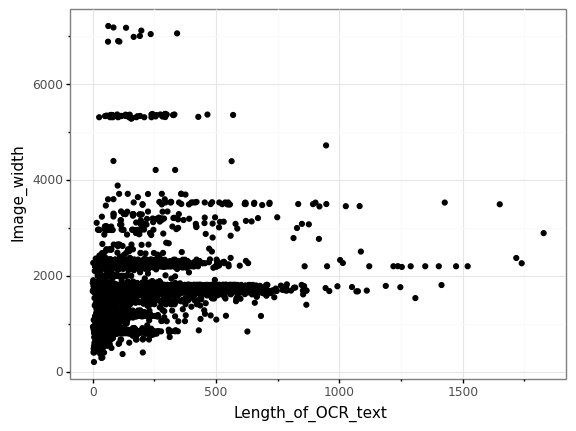

<ggplot: (-9223363257730097639)>


In [ ]:
warnings.filterwarnings('ignore')
print("\t\tGG-Plot of length of OCR text vs Image Width")
print(
    p9.ggplot(df, p9.aes(x='Length_of_OCR_text', y='Image_width')) + 
    p9.geom_point() +
    p9.theme_bw())

		GG-Plot of length of OCR text vs Image Height


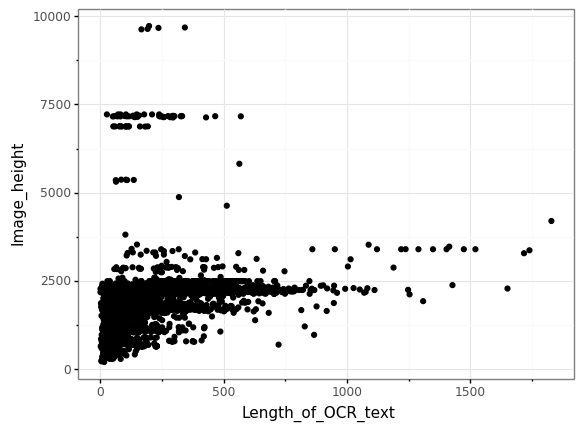

<ggplot: (8779109404371)>


In [ ]:
warnings.filterwarnings('ignore')
print("\t\tGG-Plot of length of OCR text vs Image Height")
print(
    p9.ggplot(df, p9.aes(x='Length_of_OCR_text', y='Image_height')) + 
    p9.geom_point() +
    p9.theme_bw())

*Over here we can conclude that less the length of the OCR texts are, less the image width and heights are.*

## **4.3. Questions and Answers**

### **4.2.1. Questions**

In [ ]:
with open('/content/Data/train/train_v1.0.json', 'r') as f:
    annotations = json.load(f)
print('Number of questions in Train data : ',len(annotations['data']))

Number of questions in Train data :  39463


In [ ]:
# Code snippet to get the questions and the number of questions related to a unique image

questions = []
for image_str in df['Image']:
  question = []
  for i in annotations['data']:
    if image_str.split('/')[-1] in i['image']:
      question.append(i['question'].lower())
  questions.append(question)

number_of_questions = []
for i in questions:
  number_of_questions.append(len(i))

In [ ]:
df['Questions'] = questions
df['Number_of_Questions'] = number_of_questions
df.head()

,Image,Image_width,Image_height,OCR,Length_of_OCR_text,Questions,Number_of_Questions
0,/content/Data/train/documents/lzfl0226_26.png,796,1046,/content/Data/train/ocr_results/lzfl0226_26.json,80,[which state is the commodity credit corporati...,6
1,/content/Data/train/documents/nljw0023_1.png,1692,2245,/content/Data/train/ocr_results/nljw0023_1.json,215,"[on which date offer completes?, what is the n...",2
2,/content/Data/train/documents/skvj0223_9.png,1467,1986,/content/Data/train/ocr_results/skvj0223_9.json,233,"[what is the name of company?, where is it lo...",4
3,/content/Data/train/documents/rjwm0227_2.png,2256,1755,/content/Data/train/ocr_results/rjwm0227_2.json,69,[what amount is the total expenditure for all ...,3
4,/content/Data/train/documents/xrcy0227_30.png,1776,751,/content/Data/train/ocr_results/xrcy0227_30.json,50,"[what is the vo. no. mentioned in the check?, ...",4


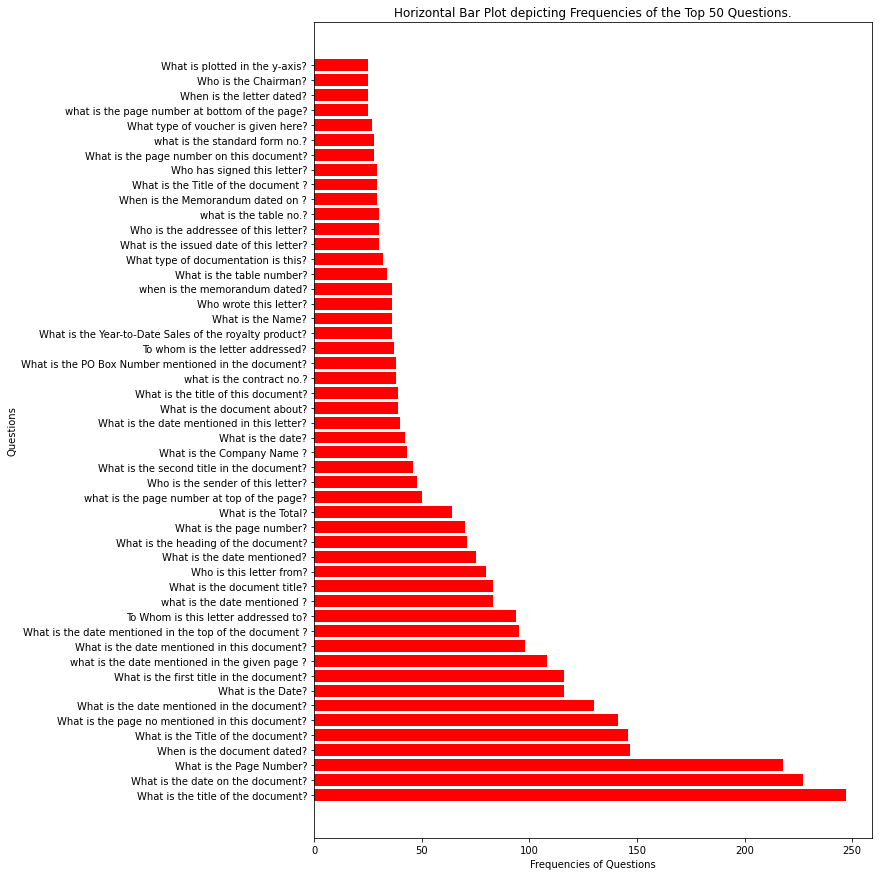

In [ ]:
question = []
for i in annotations['data']:
  question.append(i['question'])

top_questions = pd.Series(question).value_counts()[:50]

# Code to plot the horizontal barplot w.r.t. the above data
fig = plt.subplots(figsize =(10, 15)) 
ax = plt.barh(list(top_questions.index),
             list(top_questions.values),
             color ='red') 
plt.xlabel("Frequencies of Questions")
plt.ylabel("Questions")
plt.title("Horizontal Bar Plot depicting Frequencies of the Top 50 Questions.")

plt.show()

In [ ]:
# Getting all the average widths and heights of the top 50 questions

top_questions = list(pd.Series(question).value_counts()[:50].keys())
top_question_avg_width = []
top_question_avg_height = []

for quest in top_questions:
  sum_w = 0
  sum_h = 0
  count = 0
  for data in annotations['data']:
    if data['question']==quest:
      w,h = PIL.Image.open('/content/Data/train/'+data['image']).size
      sum_w = sum_w + w
      sum_h = sum_h + h
      count = count + 1
  top_question_avg_width.append(sum_w/count)
  top_question_avg_height.append(sum_h/count)

In [ ]:
for i in range(len(top_questions)):
  print(top_questions[i],' : ',top_question_avg_width[i],',',np.round(top_question_avg_height[i],2))

What is the title of the document?  :  1714.238866396761 , 2042.48
What is the date on the document?  :  1649.079295154185 , 1935.84
What is the Page Number?  :  1952.4954128440368 , 2401.85
When is the document dated?  :  1683.4013605442176 , 2012.1
What is the Title of the document?  :  1711.1849315068494 , 2080.54
What is the page no mentioned in this document?  :  1789.1985815602836 , 2305.84
What is the date mentioned in the document?  :  1628.8692307692309 , 1877.8
What is the Date?  :  1589.698275862069 , 1979.7
What is the first title in the document?  :  1672.0603448275863 , 2024.17
what is the date mentioned in the given page ?  :  1569.2222222222222 , 1945.27
What is the date mentioned in this document?  :  1544.6224489795918 , 1855.0
What is the date mentioned in the top of the document ?  :  1686.8736842105263 , 2192.76
To Whom is this letter addressed to?  :  1454.6382978723404 , 1800.21
what is the date mentioned ?  :  1665.867469879518 , 2030.42
What is the document tit

There are various Aspect Ratios with respect to images. 

Some of which are - 

1.   *1:1 = 1/1 = 1*
2.   *4:3 = 4/3 = 1.33*
3.   *16:9 = 16/9 = 1.78*

In [ ]:
for i in range(len(top_questions)):
  temp = np.round(top_question_avg_height[i]/top_question_avg_width[i],1)
  if temp>1.3:
    print(top_questions[i],' : ',temp)

Who is the Chairman?  :  1.4


Thus there is only one question which has an average aspect ratio just greater than 4:3.

In [ ]:
for i in range(len(top_questions)):
  temp = np.round(top_question_avg_height[i]/top_question_avg_width[i],1)
  if temp<1.3:
    print(top_questions[i],' : ',temp)

What is the title of the document?  :  1.2
What is the date on the document?  :  1.2
What is the Page Number?  :  1.2
When is the document dated?  :  1.2
What is the Title of the document?  :  1.2
What is the date mentioned in the document?  :  1.2
What is the Date?  :  1.2
What is the first title in the document?  :  1.2
what is the date mentioned in the given page ?  :  1.2
What is the date mentioned in this document?  :  1.2
To Whom is this letter addressed to?  :  1.2
what is the date mentioned ?  :  1.2
What is the document title?  :  1.2
What is the heading of the document?  :  1.2
What is the page number?  :  1.2
What is the Total?  :  1.2
What is the second title in the document?  :  1.2
What is the date?  :  1.2
What is the document about?  :  1.2
What is the title of this document?  :  1.2
What is the PO Box Number mentioned in the document?  :  1.2
What is the Name?  :  1.2
when is the memorandum dated?  :  1.2
What is the table number?  :  1.0
What is the issued date of thi

These were the questions with average aspect ratios close to 1:1.

In [ ]:
for i in range(len(top_questions)):
  temp = np.round(top_question_avg_height[i]/top_question_avg_width[i],1)
  if temp==1.3:
    print(top_questions[i],' : ',temp)

What is the page no mentioned in this document?  :  1.3
What is the date mentioned in the top of the document ?  :  1.3
Who is this letter from?  :  1.3
What is the date mentioned?  :  1.3
what is the page number at top of the page?  :  1.3
Who is the sender of this letter?  :  1.3
What is the Company Name ?  :  1.3
What is the date mentioned in this letter?  :  1.3
what is the contract no.?  :  1.3
To whom is the letter addressed?  :  1.3
What is the Year-to-Date Sales of the royalty product?  :  1.3
Who wrote this letter?  :  1.3
What type of documentation is this?  :  1.3
Who is the addressee of this letter?  :  1.3
What is the Title of the document ?  :  1.3
Who has signed this letter?  :  1.3
What is the page number on this document?  :  1.3
what is the standard form no.?  :  1.3
What type of voucher is given here?  :  1.3
When is the letter dated?  :  1.3


Most of the questions asked on the documents related to letters have an average aspect ratio of 4:3.

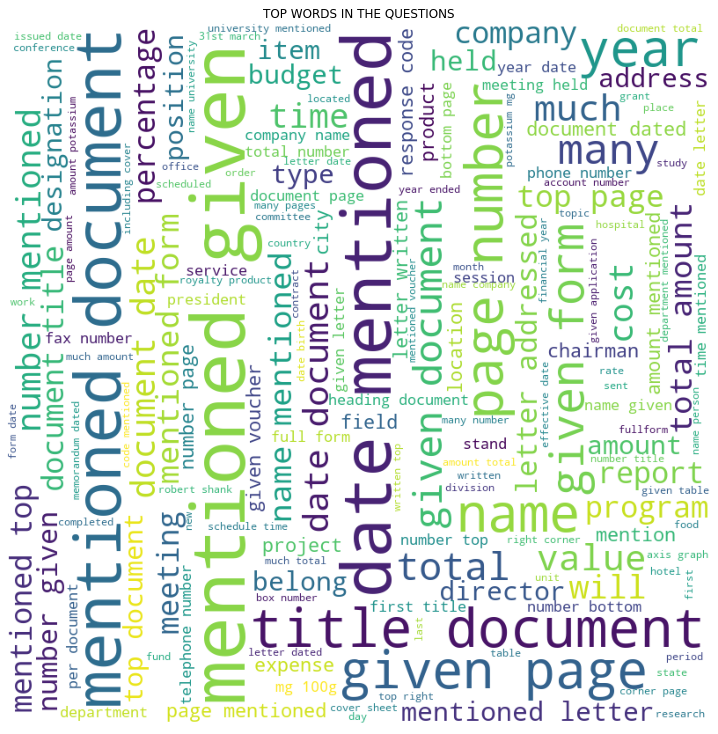

In [ ]:
comment_words = ' '
stopwords = set(STOPWORDS)
tokens = []
for val in question:
    tokens.extend(val.split())
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '
    
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (10,10), facecolor = None)
plt.title("TOP WORDS IN THE QUESTIONS")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

*This is a WordCloud where we can see the words in questions on the basis of the font size which indicates that bigger the font is, more the frequency of the word is.*

### **4.2.2. Answers**

In [ ]:
# Code snippet to get the answers with respect to a unique image and the question asked on it

answers = []
for image_str in tqdm(df['Image']):
  answer = []
  for i in annotations['data']:
    if image_str.split('/')[-1] in i['image']:
      more_answers = []
      for ans in i['answers']:
        more_answers.append(ans.lower())
      answer.append(more_answers)
  answers.append(answer)

100%|██████████| 10194/10194 [03:04<00:00, 55.23it/s]


In [ ]:
df['Answers'] = answers
df.head()

,Image,Image_width,Image_height,OCR,Length_of_OCR_text,Questions,Number_of_Questions,Answers
0,/content/Data/train/documents/lzfl0226_26.png,796,1046,/content/Data/train/ocr_results/lzfl0226_26.json,80,[which state is the commodity credit corporati...,6,"[[new york, new york], [mr. louis v. place', j..."
1,/content/Data/train/documents/nljw0023_1.png,1692,2245,/content/Data/train/ocr_results/nljw0023_1.json,215,"[on which date offer completes?, what is the n...",2,"[[01/15/98], [mm smoker-get-a-smoker name gene..."
2,/content/Data/train/documents/skvj0223_9.png,1467,1986,/content/Data/train/ocr_results/skvj0223_9.json,233,"[what is the name of company?, where is it lo...",4,"[[ceejay tobacco limited, ceejay tobacco limit..."
3,/content/Data/train/documents/rjwm0227_2.png,2256,1755,/content/Data/train/ocr_results/rjwm0227_2.json,69,[what amount is the total expenditure for all ...,3,"[[$188.50], [$114.00, $ 114.00], [4/15/77]]"
4,/content/Data/train/documents/xrcy0227_30.png,1776,751,/content/Data/train/ocr_results/xrcy0227_30.json,50,"[what is the vo. no. mentioned in the check?, ...",4,"[[74-56-225, 74 - 56 -225], [march 1, 1974], [..."


In [ ]:
answers = []
for i in annotations['data']:
  temp_list = []
  for ans in i['answers']:
    temp_list.append(ans.lower())
  answers.append(temp_list)

In [ ]:
# Finding the length of the answers

length_of_answers = []
for ans in answers:
  length = 0
  for i in ans:
    if length<len(i.split()):
      length = len(i.split())
      length_of_answers.append(length)

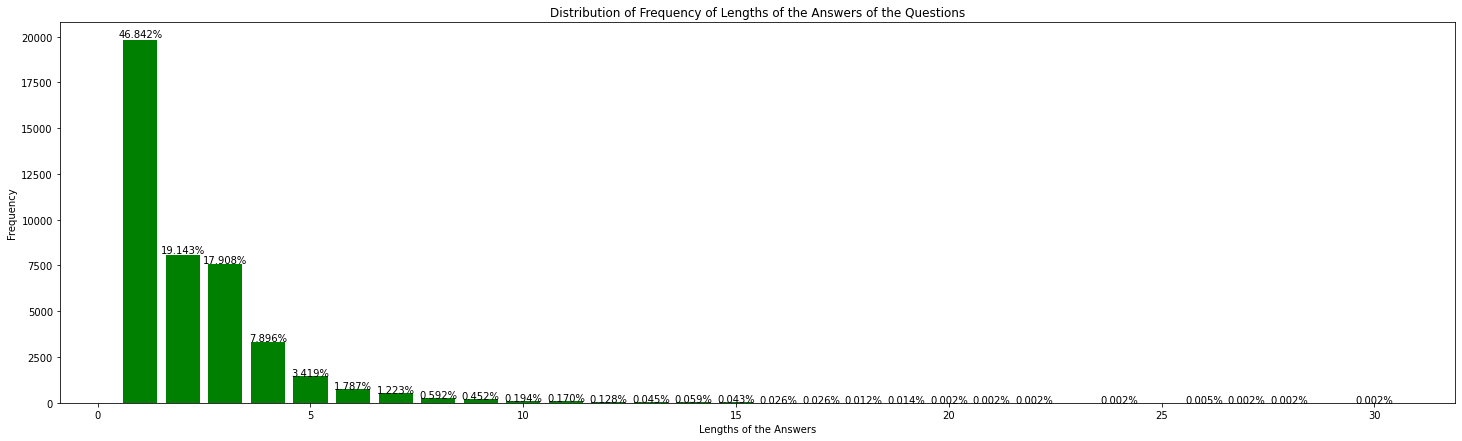

In [ ]:
count_len = dict(pd.Series(length_of_answers).value_counts())
total = len(length_of_answers)

# Code to output barplot with respect to above mentioned data
fig = plt.subplots(figsize =(25, 7)) 
ax = plt.bar(count_len.keys(),
             count_len.values(),
             color ='green',
             width = 0.8) 
plt.xlabel("Lengths of the Answers") 
plt.ylabel("Frequency") 
plt.title("Distribution of Frequency of Lengths of the Answers of the Questions")

# Code to print percentages of the frequency of Lengths of Answers w.r.t the entire data
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    plt.annotate('{:.3%}'.format(height/total), (p.get_x()+.5*width, p.get_y() + height + height*0.01), ha = 'center')

plt.show()

*It looks like that there are a lot of answers with number of words less than 6.*

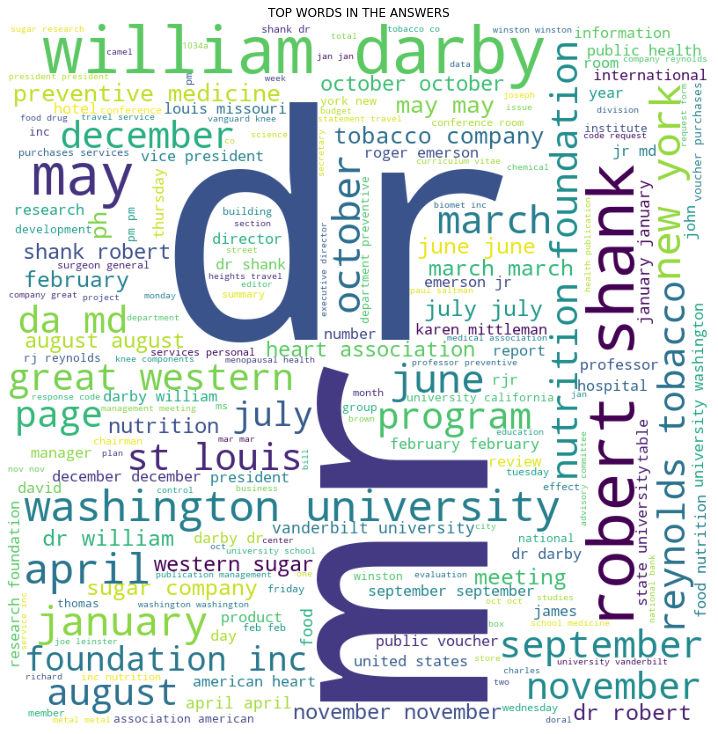

In [ ]:
comment_words = ' '
stopwords = set(STOPWORDS)
tokens = []
for val in answers:
  for i in val:
    val = str(i)
    tokens.extend(val.split())
for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()
for words in tokens :
    comment_words = comment_words + words + ' '
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = stopwords,min_font_size = 10).generate(comment_words)

plt.figure(figsize = (10,10), facecolor = None)
plt.title("TOP WORDS IN THE ANSWERS")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

*This is a WordCloud where we can see the words in answers on the basis of the font size which indicates that bigger the font is, more the frequency of the word is.*

### **4.2.3. Questions vs. Answers**

In [ ]:
top_questions = list(pd.Series(question).value_counts()[:50].keys())
top_question_avg_len_ans = []

for quest in top_questions:
  sum_quest = 0
  count = 0
  for data in annotations['data']:
    if data['question']==quest:
      length = 0
      ans = data['answers']
      for i in ans:
        i = " ".join(i.split())
        if length<len(i):
          sum_quest = sum_quest + len(i.split())
          count = count + 1
  top_question_avg_len_ans.append(sum_quest/count)

In [ ]:
for i in range(len(top_questions)):
  print(top_questions[i],' : ',int(np.round(top_question_avg_len_ans)[i]))

What is the title of the document?  :  5
What is the date on the document?  :  3
What is the Page Number?  :  1
When is the document dated?  :  3
What is the Title of the document?  :  3
What is the page no mentioned in this document?  :  1
What is the date mentioned in the document?  :  2
What is the Date?  :  2
What is the first title in the document?  :  4
what is the date mentioned in the given page ?  :  3
What is the date mentioned in this document?  :  2
What is the date mentioned in the top of the document ?  :  2
To Whom is this letter addressed to?  :  3
what is the date mentioned ?  :  3
What is the document title?  :  5
Who is this letter from?  :  3
What is the date mentioned?  :  3
What is the heading of the document?  :  4
What is the page number?  :  1
What is the Total?  :  1
what is the page number at top of the page?  :  1
Who is the sender of this letter?  :  3
What is the second title in the document?  :  3
What is the Company Name ?  :  4
What is the date?  :  2
W

*Thus, there are on an average of 3 words in the answers with respect to the top questions. It looks like it's obvious in some cases that the page numbers, for numbers or anything related to numbers have one lettered answers.*